In [37]:
import pandas as pd
import numpy as np

from  sklearn.datasets import make_classification

In [38]:
x,y = make_classification(n_samples=100,n_features=5,n_clusters_per_class=1)

In [39]:
df = pd.DataFrame(x,columns = ['col1','col2','col3','col4','col5'])


In [40]:
df['target'] = y

In [41]:
df.head()

,col1,col2,col3,col4,col5,target
0,-0.027740,0.274385,-1.346724,0.769962,-0.424191,0
1,0.238163,-1.258327,-1.031304,0.667047,-0.654704,0
2,-0.627670,1.559891,-1.787065,0.958674,-0.294274,1
3,-1.228791,-1.440246,-1.007952,0.663036,-0.687145,0
4,-1.550482,1.063277,-0.857600,0.443469,-0.070528,1


In [52]:
import random

def row_sample(df, percent):
    return df.sample(int(percent * df.shape[0]), replace=True)

# columns or feature sampling
def col_sample(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent * df.shape[1]))
    new_df= df[cols]
    new_df['target'] = df['target']
    return new_df

# combined sampling
def combined(df, row_p, col_p):
    row_df = row_sample(df, row_p)
    col_df = col_sample(row_df, col_p)
    col_df['target'] = row_df['target']
    return col_df


In [53]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()



In [54]:
#row sample
df1 = row_sample(df,0.1)
df2 = row_sample(df,0.1)
df3 = row_sample(df,0.1)

clf1.fit(df1.iloc[:,:-1],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,:-1],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,:-1],df3.iloc[:,-1])


DecisionTreeClassifier()

In [55]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[4] <= -0.318\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

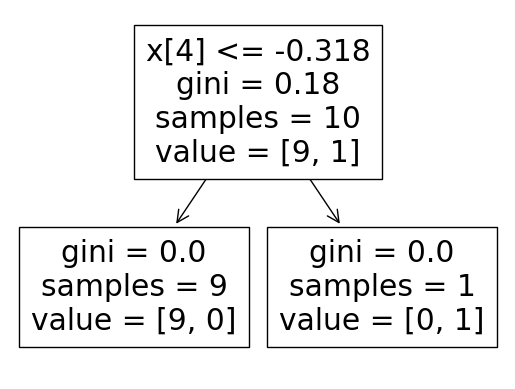

In [56]:
plot_tree(clf1)


[Text(0.5, 0.75, 'x[4] <= -0.389\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

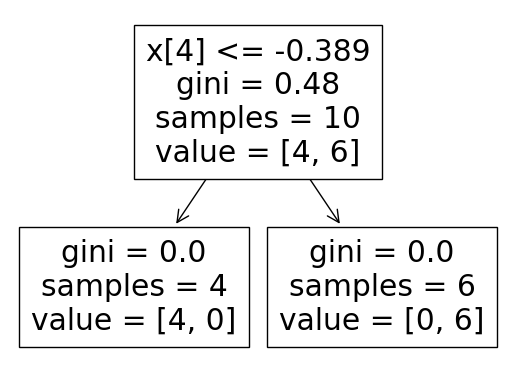

In [57]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[4] <= -0.388\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

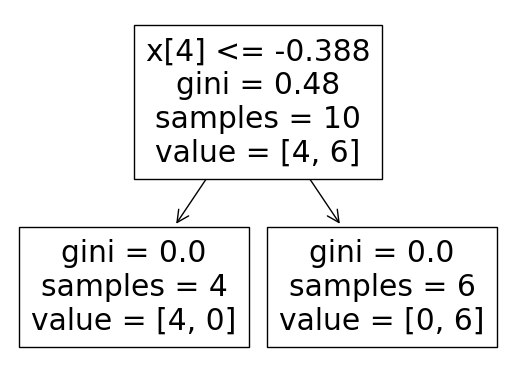

In [58]:
plot_tree(clf3)

In [60]:
#column sampling
df1 = col_sample(df,0.8)
df2 = col_sample(df,0.8)
df3 = col_sample(df,0.8)

clf1.fit(df1.iloc[:,:-1],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,:-1],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,:-1],df3.iloc[:,-1])





C:\Users\Admin\AppData\Local\Temp\ipykernel_15592\2756910062.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\Admin\AppData\Local\Temp\ipykernel_15592\2756910062.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\Admin\AppData\Local\Temp\ipykernel_15592\2756910062.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,col5,col1,col3,col4,target
0,-0.424191,-0.027740,-1.346724,0.769962,0
1,-0.654704,0.238163,-1.031304,0.667047,0
2,-0.294274,-0.627670,-1.787065,0.958674,1
3,-0.687145,-1.228791,-1.007952,0.663036,0
4,-0.070528,-1.550482,-0.857600,0.443469,1
...,...,...,...,...,...
95,-0.143100,0.015094,-1.137069,0.599623,1
96,-0.649814,-0.703019,-0.850341,0.575815,0
97,-0.234564,-0.005598,-1.049627,0.577561,1
98,-0.625166,-1.365536,-0.845528,0.567634,0


[Text(0.5, 0.75, 'x[4] <= -0.318\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

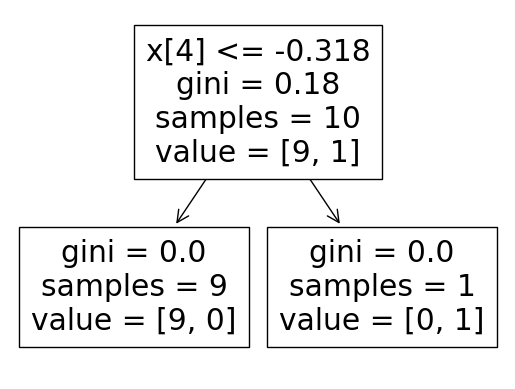

In [61]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[4] <= -0.389\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

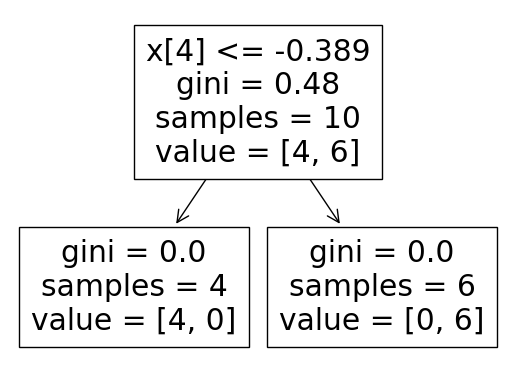

In [62]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[4] <= -0.388\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

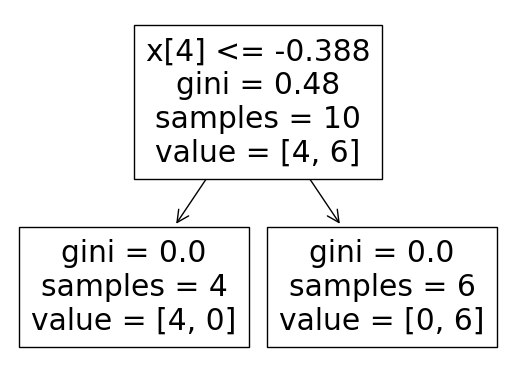

In [63]:
plot_tree(clf3)

In [ ]:
df1 = combined(df,0.8)
df2 = combined(df,0.8)
df3 = col_sample(df,0.8)

clf1.fit(df1.iloc[:,:-1],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,:-1],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,:-1],df3.iloc[:,-1])